# 4.9 Intro to Data Visualization with Python. CourseWork

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Creating Directory Path
path = r'C:\Users\luke_\Desktop\CF Datacourse\Python_exercise4\09-2024 Instacart Basket Analysis\02_data'

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join (path, 'prepared_data', 'ords_prods_merge_4.8.pkl'))

In [5]:
# checking dataframe
ords_prods_merge.shape

(32404859, 23)

In [6]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,_merge,price_range_loc,Busiest_day,days_performance,busiest_period_of_day,max_order,loyalty_flag,user_order_behaviour,frequency_flag,Frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,both,Mid-range product,Regularly busy,Regular Days,Most orders,32,Regular customer,30.0,Non-frequent customer,NaN
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,both,Mid-range product,Regularly busy,Regular Days,Average orders,32,Regular customer,30.0,Non-frequent customer,NaN
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,both,Mid-range product,Busiest day,Busiest Days,Average orders,5,New customer,8.0,Frequent customer,NaN
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,both,Mid-range product,Regularly busy,Slowest Days,Most orders,3,New customer,13.0,Regular customer,Regular customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,both,Mid-range product,Least busy,Slowest Days,Average orders,3,New customer,13.0,Regular customer,Regular customer


# the column droped in the previous exercise is back, so I will drop it again. And save it.

In [7]:
ords_prods_merge = ords_prods_merge.drop(columns = ['Frequency_flag'])

In [8]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,reordered,_merge,price_range_loc,Busiest_day,days_performance,busiest_period_of_day,max_order,loyalty_flag,user_order_behaviour,frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,0,both,Mid-range product,Regularly busy,Regular Days,Most orders,32,Regular customer,30.0,Non-frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,both,Mid-range product,Regularly busy,Regular Days,Average orders,32,Regular customer,30.0,Non-frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,0,both,Mid-range product,Busiest day,Busiest Days,Average orders,5,New customer,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,0,both,Mid-range product,Regularly busy,Slowest Days,Most orders,3,New customer,13.0,Regular customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,1,both,Mid-range product,Least busy,Slowest Days,Average orders,3,New customer,13.0,Regular customer


<Axes: xlabel='order_day_of_week'>

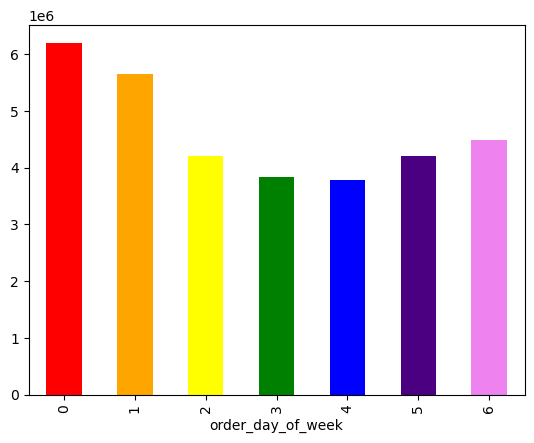

In [9]:
# Creating a plotbar. we can use the command .sort_index() to order the x-axis. Without we will get the graph sorted by the y-axis
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

# Exporting charts. This is just a preview. In order to save this chart we need to tell python to do that.

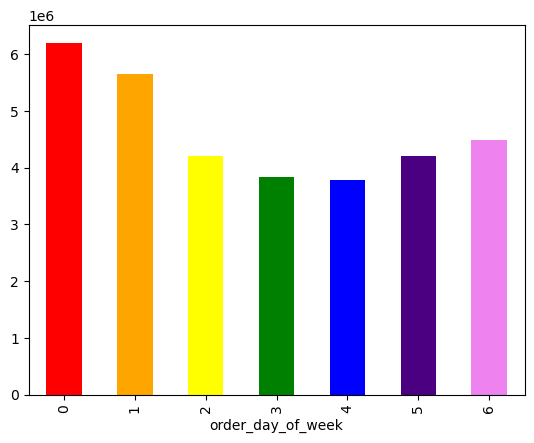

In [10]:
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

In [11]:
#creating another directory path
path2 = r'C:\Users\luke_\Desktop\CF Datacourse\Python_exercise4\09-2024 Instacart Basket Analysis'

In [12]:
# saving the image.
bar.figure.savefig(os.path.join(path2, '04_analysis','visualisations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

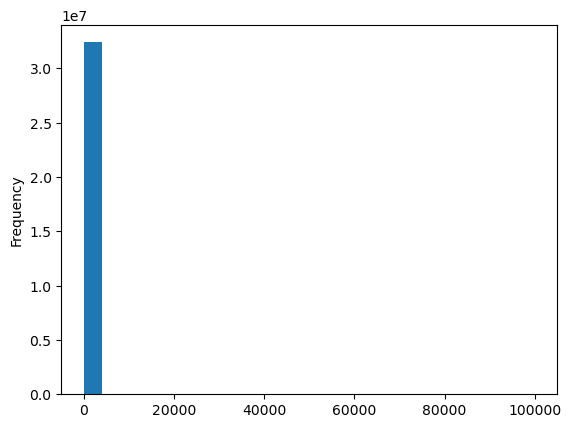

In [13]:
#creating a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

In [14]:
# this is broken. the max price is 9999 dollars. Which can not be right
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

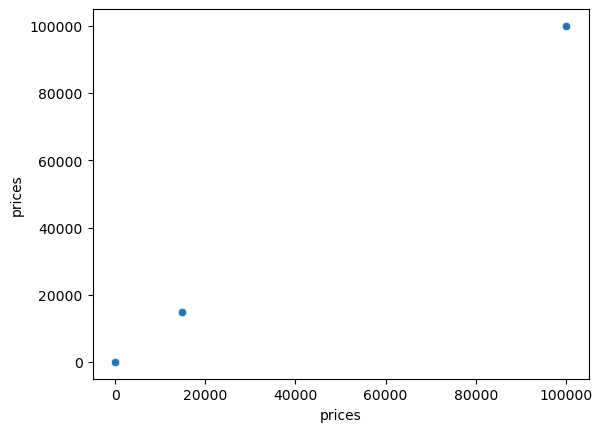

In [15]:
# As you learned in Achievement 2, another way to explore your data is to create a scatterplot. 
#Normally, you’d use scatterplots to investigate the relationship between two variables. However, when conducting an exploratory analysis, 
# you can also use scatterplots to visualize the distribution of data points in order to identify any outliers.
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [16]:
# there seems to be a lot of outliers. we can investigate further by checking for any prices over 100$
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,reordered,_merge,price_range_loc,Busiest_day,days_performance,busiest_period_of_day,max_order,loyalty_flag,user_order_behaviour,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,0,both,High-range product,Regularly busy,Regular Days,Most orders,40,Regular customer,30.0,Non-frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,1,both,High-range product,Regularly busy,Regular Days,Most orders,40,Regular customer,30.0,Non-frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,0,both,High-range product,Regularly busy,Regular Days,Average orders,4,New customer,13.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,1,both,High-range product,Busiest day,Busiest Days,Average orders,4,New customer,13.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,0,both,High-range product,Regularly busy,Busiest Days,Average orders,16,Regular customer,30.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,0,both,High-range product,Busiest day,Busiest Days,Average orders,39,Regular customer,30.0,Non-frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,1,both,High-range product,Busiest day,Busiest Days,Most orders,39,Regular customer,30.0,Non-frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,0,both,High-range product,Regularly busy,Slowest Days,Most orders,15,Regular customer,11.0,Regular customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,0,both,High-range product,Regularly busy,Slowest Days,Average orders,12,Regular customer,30.0,Non-frequent customer


In [17]:
#For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column. 
#To turn them into NaNs, use the following code:

ords_prods_merge = ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

AttributeError: 'float' object has no attribute 'loc'

In [ ]:
# check whether the replacement was successful by running a max-value check on your “prices” column
ords_prods_merge['prices'].max()

In [ ]:
#creating a histagram again
ords_prods_merge['prices'].plot.hist(bins = 75)

In [ ]:
hist = ords_prods_merge['prices'].plot.hist(bins = 75)

In [ ]:
hist.figure.savefig(os.path.join(path2, '04_analysis','visualisations', 'hist_prices.png'))

In [ ]:
np.random.seed(4)

In [ ]:
#creating a list holding true/false values, randomly spliting the df into 70 and 30%
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [ ]:
#creating a df holding 70%
big = ords_prods_merge[dev]

In [ ]:
# creating a df holding 30%
small = ords_prods_merge[~dev]

In [ ]:
#checking that the rows are the same
len(ords_prods_merge)

In [ ]:
len(big) + len(small)

In [ ]:
df_2 = small[['order_day_of_week','prices']]

In [ ]:
len(df_2) + len(big)

In [ ]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [ ]:
line.figure.savefig(os.path.join(path2, '04_analysis','visualisations', 'price_over_week.png'))